In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = "/content/optdigits.tra"
df_train = pd.read_csv(train_path, header = None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6


In [ ]:
test_path = "/content/optdigits.tes"
df_test = pd.read_csv(test_path, header = None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


In [ ]:
X_train = df_train[np.arange(64)] #Train Data without class label
y_train = df_train[64] #Class Label

In [ ]:
X_test = df_test[np.arange(64)] #Test Data without class label
y_test = df_test[64] #Class Label

## **Create Covariance Matrix**

In [ ]:
def covariance_matrix(X):
    m, n = X.shape 
    mean = X.mean(axis=0)
    cov_matrix = (X - mean).T.dot((X - mean)) / m-1
    np.random.seed(2020)
    return cov_matrix + 0.00001 * np.random.rand(n,n)

cov_mat = np.array(covariance_matrix(X_train))
cov_mat_inv = np.linalg.inv(cov_mat) #Covariance matrix inverse
cov_mat_det = np.linalg.det(cov_mat) #Covariance matrix determinant

## **Create Multi Gausssian Kernel Using Mahalanobis Distance**

In [ ]:
def multi_gaussian_kernel(x):
    n = len(cov_mat)
    return (np.exp(-0.5 * np.dot(x.T, np.dot(cov_mat_inv, x))) 
            / (2 * np.pi)**(n/2) 
            / np.sqrt(cov_mat_det))

### **Implementing the multivariate nonparametric classification algorithm with Gaussian kernel**

In [ ]:
h = 1.438449888287663 #bandwidth
y_pred = []

for index, row_test in X_test.iterrows(): #Each row from X_test
  gi = []
  row_test = np.array(row_test)
  for c,rows in X_train.groupby(y_train):# Each row from X_train that grouping by classes
    total = []
    for index, row in rows.iterrows():
      row = np.array(row)
      total += [(multi_gaussian_kernel((row_test.T-row.T)/h))] #Calculate distance using mahalanobis
    gi += [np.sum(total)]
  y_pred.append(np.argmax(gi)) #Choosing class label which has maximum discriminant value

## **Calculate Accuracy Metric**

In [ ]:
def evaluate_accuracy(y_test, y_pred):
	correct_val = 0
	for i in range(len(y_test)):
		if y_test[i] == y_pred[i]:
			correct_val += 1
	return correct_val / float(len(y_test))

accuracy_val = evaluate_accuracy(y_test, y_pred)
print(accuracy_val)

0.9421257651641625


## **Plotting Confusion Matrix**

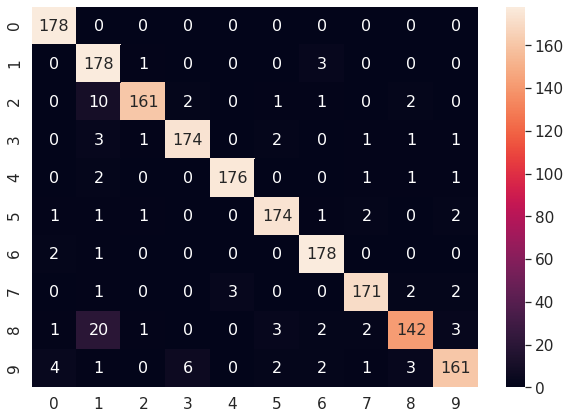

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mat_arr = confusion_matrix(y_test, y_pred) #Create a confusion matrix array
confusion_mat_data = pd.DataFrame(confusion_mat_arr, columns=np.unique(y_pred), index = np.unique(y_pred)) #Convert array to dataframe


#Plotting Confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #label size
sns.heatmap(confusion_mat_data, annot=True,annot_kws={"size": 16},fmt='g')

plt.show()